# Wrap up quiz

In [3]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")

target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]

# Since we have not yet encountered Regression problems, convert the Regression target into a classification target to predict whether a house is expensive or not:
target = (target > 200_000).astype(int)

In [5]:
# q1:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [ ]:
# q1:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# q2:
data.shape

(1460, 79)

In [8]:
# q3:
from sklearn.compose import make_column_selector as selector

# define column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# define column names
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

# output number of numerical columns
print(len(numerical_columns))


36


In [21]:
# q5: Now create a predictive model that uses these numerical columns as input data. Your predictive model should be a pipeline composed of a sklearn.preprocessing
# StandardScaler to scale these numerical data and a sklearn.linear_model.LogisticRegression.
# What is the accuracy score obtained by 10-fold cross-validation (you can set the parameter cv=10 when calling cross_validate) of this pipeline?
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

data_numeric = data[numerical_columns]

# define numeric_transformer
numeric_transformer = StandardScaler()

# define ColumnTransformer (handles multiple transformers for diff dtypes)
preprocessor = ColumnTransformer(
    [
        ("numeric-transformer", numeric_transformer, numerical_columns)
    ],
    remainder="passthrough"   # in this case, does nothing as there are no other column dtypes
)

# define pipeline (treat as any other predictor)
model = make_pipeline(preprocessor, LogisticRegression())

# cross-validation score
cv_result = cross_validate(model, data_numeric, target, cv = 10)
test_score_numeric = cv_result['test_score']

print(
    f"The mean score is {score.mean():.3f}"
)


The mean score is 0.923


In [20]:
# q6: Instead of solely using the numerical columns, let us build a pipeline that can process both the numerical and categorical features together
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_selector as selector

# define column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# define column names
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

# define numeric_transformer
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# define ColumnTransformer (handles multiple transformers for diff dtypes)
preprocessor = ColumnTransformer(
    [
        ("numeric-transformer", numeric_transformer, numerical_columns),
        ("categorical-transformer", categorical_transformer, categorical_columns)
    ],
)

# define pipeline (treat as any other predictor)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

# cross-validation score
cv_result = cross_validate(model, data, target, cv = 10)
test_score_all = cv_result['test_score']

print(
    f"The mean score is {score.mean():.3f}"
)


The mean score is 0.923


One way to compare two models is by comparing their means, but small differences in performance measures might easily turn out to be merely by chance (e.g. when using random resampling during cross-validation), and not because one model predicts systematically better than the other.

Another way is to compare cross-validation test scores of both models fold-to-fold, i.e. counting the number of folds where one model has a better test score than the other. This provides some extra information: are some partitions of the data making the classification task particularly easy or hard for both models?

Let's visualize the second approach.

A model using all features is better than a model using only numerical features for 5 CV iterations out of 10.


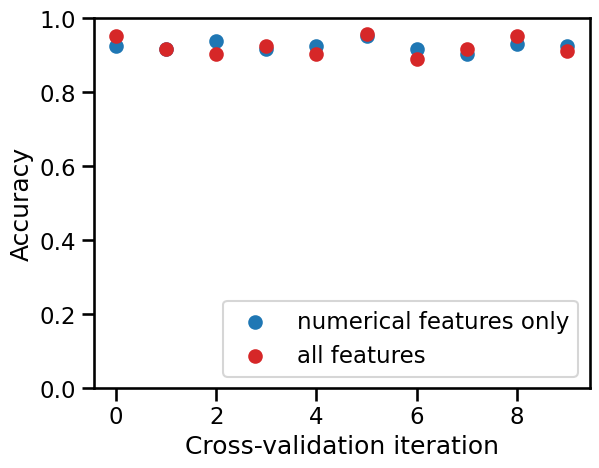

In [23]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(test_score_numeric))

plt.scatter(
    indices, test_score_numeric, color="tab:blue", label="numerical features only"
)
plt.scatter(
    indices,
    test_score_all,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(loc="lower right")

print(
    "A model using all features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_all > test_score_numeric)} CV iterations out of 10."
)

We observe that 9 times out of 10, the model based on both numerical and categorical features is better than the model that only uses numerical features.